# Plot alignment statistics of barcode library

## Load libraries and define analysis-specific parameters

PB: We should add rasilabRtemplates to the Docker and Singularity containers. 

In [1]:
suppressMessages(library(Biostrings))
suppressMessages(library(plyranges))
suppressMessages(library(tidyverse))

## Read alignment log

In [2]:
align_log <- list.files("../data/alignments/", pattern = "*.log", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(log = map(file, readLines)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.bowtie2.log)")) %>% 
  select(-sno, -file) %>% 
  unnest() %>% 
  print()

Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(log)`”


# A tibble: 24 × 2
   log                                             sample_name          
   <chr>                                           <chr>                
 1 "53234670 reads; of these:"                     didi_grna_1_barcode_1
 2 "  53234670 (100.00%) were unpaired; of these:" didi_grna_1_barcode_1
 3 "    47116690 (88.51%) aligned 0 times"         didi_grna_1_barcode_1
 4 "    6117848 (11.49%) aligned exactly 1 time"   didi_grna_1_barcode_1
 5 "    132 (0.00%) aligned >1 times"              didi_grna_1_barcode_1
 6 "11.49% overall alignment rate"                 didi_grna_1_barcode_1
 7 "35623492 reads; of these:"                     didi_grna_2_barcode_1
 8 "  35623492 (100.00%) were unpaired; of these:" didi_grna_2_barcode_1
 9 "    31525445 (88.50%) aligned 0 times"         didi_grna_2_barcode_1
10 "    4097906 (11.50%) aligned exactly 1 time"   didi_grna_2_barcode_1
# … with 14 more rows


##  How many total reads and reads with expected barcodes?


── Column specification ────────────────────────────────────────────────────────
cols(
  sample_name = col_character(),
  type = col_character(),
  count = col_double()
)



# A tibble: 12 × 4
   sample_name           read  type      count
   <chr>                 <chr> <chr>     <dbl>
 1 didi_grna_1_barcode_1 total all    53234670
 2 didi_grna_1_barcode_1 aln   unique  6117848
 3 didi_grna_1_barcode_1 aln   multi       132
 4 didi_grna_2_barcode_1 total all    35623492
 5 didi_grna_2_barcode_1 aln   unique  4097906
 6 didi_grna_2_barcode_1 aln   multi       141
 7 didi_mrna_1_barcode_1 total all    43657826
 8 didi_mrna_1_barcode_1 aln   unique  4464012
 9 didi_mrna_1_barcode_1 aln   multi        88
10 didi_mrna_2_barcode_1 total all    56095292
11 didi_mrna_2_barcode_1 aln   unique  6067856
12 didi_mrna_2_barcode_1 aln   multi       292


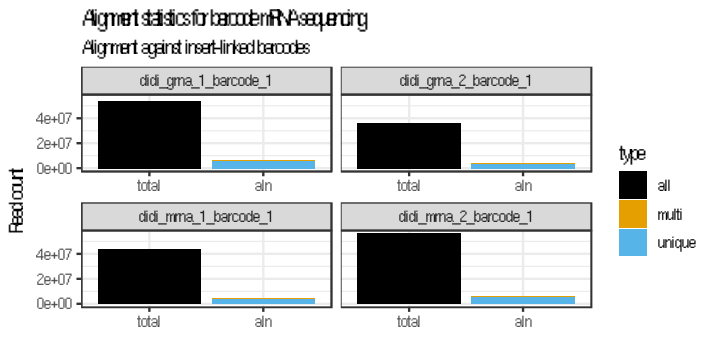

In [3]:
options(repr.plot.width=6, repr.plot.height=3)

plot_data <- align_log %>% 
  mutate(total_all = str_extract(log, "^[:digit:]+(?= reads;)")) %>% 
  mutate(aln_unique = str_extract(log, "[:digit:]+(?=.+exactly)")) %>% 
  mutate(aln_multi = str_extract(log, "[:digit:]+(?=.+>1)")) %>% 
  select(-log) %>% 
  pivot_longer(-sample_name, names_to = 'type', values_to = 'count') %>% 
  filter(!is.na(count)) %>% 
  type_convert() %>% 
  separate(type, c("read", "type")) %>% 
  print()

plot_data %>% 
  ggplot(aes(x = fct_rev(read), y = count, fill = type)) +
  facet_wrap(~sample_name, ncol = 2, scales = "free_x") +
  geom_col() +
  ggthemes::scale_fill_colorblind() +
  theme_bw() +
  labs(x = "", y = "Read count",
       title = "Alignment statistics for barcode mRNA sequencing",
       subtitle = "Alignment against insert-linked barcodes")

## Get readcounts for each barcode

In [4]:
barcode_counts <- list.files("../data/barcode_counts/", pattern = ".tsv.gz$", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(counts = map(file, read_tsv)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.tsv.gz)")) %>% 
  select(-sno, -file) %>% 
  unnest() %>% 
  rename(barcode_count = count, barcode_num = barcode) %>% 
  mutate(sample_name = str_extract(sample_name, ".+(?=_barcode)")) %>% 
  print()

Rows: 20577 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 18342 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 21807 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 24056 Columns: 2
── Column specification ────────────────────────────────────────────────────────

# A tibble: 84,782 × 3
   barcode_num barcode_count sample_name
         <dbl>         <dbl> <chr>      
 1       47695          4582 didi_grna_1
 2       17334          4086 didi_grna_1
 3        6711          4078 didi_grna_1
 4        5501          4068 didi_grna_1
 5        2109          3889 didi_grna_1
 6       46374          3821 didi_grna_1
 7       49997          3797 didi_grna_1
 8        1823          3785 didi_grna_1
 9       41296          3778 didi_grna_1
10       26592          3694 didi_grna_1
# … with 84,772 more rows


## Get insert-barcode linkages

In [5]:
align_log <- list.files("../data/alignments/", pattern = "*.log", full.names = T) %>% print 

insert_barcode_linkages <- list.files("../../pool2_linkage/data/filtered_barcodes/", 
                                      pattern = ".tsv.gz$", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(counts = map(file, read_tsv)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.tsv.gz)")) %>% 
  select(-sno, -file) %>% 
  unnest(cols = c(counts)) %>%
  rename(linkage_count = read_count, linkage_ref = sample_name) %>% 
  select(-barcode_1) %>%
  print()

[1] "../data/alignments//didi_grna_1_barcode_1.bowtie2.log"
[2] "../data/alignments//didi_grna_2_barcode_1.bowtie2.log"
[3] "../data/alignments//didi_mrna_1_barcode_1.bowtie2.log"
[4] "../data/alignments//didi_mrna_2_barcode_1.bowtie2.log"


Rows: 59967 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode_1
dbl (3): insert_num, barcode_num, read_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 77568 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode_1
dbl (3): insert_num, barcode_num, read_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 137,535 × 4
   insert_num barcode_num linkage_count linkage_ref   
        <dbl>       <dbl>         <dbl> <chr>         
 1        311           1             1 didi_linkage_1
 2        188           2             1 didi_linkage_1
 3          8           3             1 didi_linkage_1
 4        253           4             1 didi_linkage_1
 5        207           5             1 didi_linkage_1
 6         13           6             1 didi_linkage_1
 7        173           7             1 didi_linkage_1
 8        312           8             1 didi_linkage_1
 9         21           9             1 didi_linkage_1
10        143          10             1 didi_linkage_1
# … with 137,525 more rows


## Get sample annotations

In [6]:

sample_annotations <- read_csv("../annotations/sample_annotations.csv", comment = "#") %>% print()

Rows: 4 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): owner, sample_name, plasmid, library_type, sample_id, linkage_ref
dbl (5): barcode1_read, barcode1_start, barcode1_length, barcode1_trim5, bar...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4 × 11
  owner sample…¹ plasmid libra…² sampl…³ barco…⁴ barco…⁵ barco…⁶ linka…⁷ barco…⁸
  <chr> <chr>    <chr>   <chr>   <chr>     <dbl>   <dbl>   <dbl> <chr>     <dbl>
1 pb    didi_gr… pPBHS3… grna    107p7         1       0      24 didi_l…       0
2 pb    didi_gr… pPBHS3… mrna    107p8         1       0      24 didi_l…       0
3 pb    didi_mr… pPBHS3… grna    107p9         1       0      24 didi_l…       0
4 pb    didi_mr… pPBHS3… mrna    107p10        1       0      24 didi_l…       0
# … with 1 more variable: barcode1_trim3 <dbl>, and abbreviated variable names
#   ¹​sample_name, ²​library_type, ³​sample_id, ⁴​barcode1_read, ⁵​barcode1_start,
#   ⁶​barcode1_length, ⁷​linkage_ref, ⁸​barcode1_trim5


## Combine barcodes counts with insert linkages

In [7]:
barcode_insert_counts <- barcode_counts %>% 
  left_join(select(sample_annotations, sample_name, linkage_ref, sample_id, library_type), by = "sample_name") %>% 
  left_join(insert_barcode_linkages, by = c("linkage_ref", "barcode_num")) %>%
  print()

# A tibble: 84,782 × 8
   barcode_num barcode_count sample_name linka…¹ sampl…² libra…³ inser…⁴ linka…⁵
         <dbl>         <dbl> <chr>       <chr>   <chr>   <chr>     <dbl>   <dbl>
 1       47695          4582 didi_grna_1 didi_l… 107p7   grna         86      26
 2       17334          4086 didi_grna_1 didi_l… 107p7   grna         22       6
 3        6711          4078 didi_grna_1 didi_l… 107p7   grna        172       1
 4        5501          4068 didi_grna_1 didi_l… 107p7   grna         20       1
 5        2109          3889 didi_grna_1 didi_l… 107p7   grna        275       1
 6       46374          3821 didi_grna_1 didi_l… 107p7   grna         54      25
 7       49997          3797 didi_grna_1 didi_l… 107p7   grna        150      29
 8        1823          3785 didi_grna_1 didi_l… 107p7   grna        236       1
 9       41296          3778 didi_grna_1 didi_l… 107p7   grna         90      20
10       26592          3694 didi_grna_1 didi_l… 107p7   grna        227      11
# … w

# Write barcode insert counts to a table for post-processing

In [13]:
barcode_insert_counts %>% 
  select(sample_id, sample_name, insert_num, barcode_num, barcode_count, linkage_count, library_type, linkage_ref) %>% 
  write_tsv('../tables/sample_insert_barcode_counts.tsv.gz') %>%
  print()

barcode_num,barcode_count,sample_name,linkage_ref,sample_id,library_type,insert_num,linkage_count
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
47695,4582,didi_grna_1,didi_linkage_1,107p7,grna,86,26
17334,4086,didi_grna_1,didi_linkage_1,107p7,grna,22,6
6711,4078,didi_grna_1,didi_linkage_1,107p7,grna,172,1
5501,4068,didi_grna_1,didi_linkage_1,107p7,grna,20,1
2109,3889,didi_grna_1,didi_linkage_1,107p7,grna,275,1
46374,3821,didi_grna_1,didi_linkage_1,107p7,grna,54,25
49997,3797,didi_grna_1,didi_linkage_1,107p7,grna,150,29
1823,3785,didi_grna_1,didi_linkage_1,107p7,grna,236,1
41296,3778,didi_grna_1,didi_linkage_1,107p7,grna,90,20


ERROR: Error in eval(expr, envir, enclos): object 'ddd' not found


## Plot the number of barcodes per library

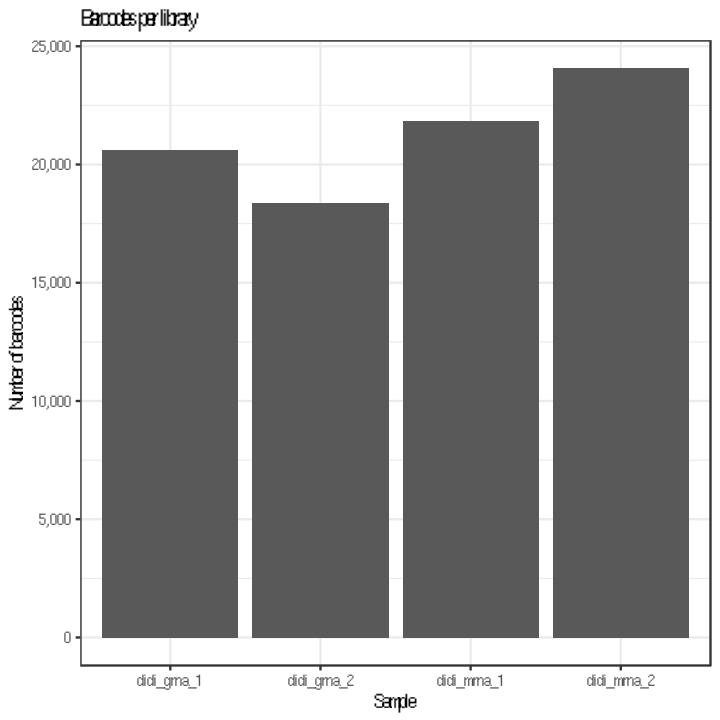

In [9]:
options(repr.plot.width=6, repr.plot.height=6)

plot_data <- barcode_insert_counts %>% 
  group_by(sample_name) %>% 
  distinct(barcode_num) %>% 
  summarize(n_barcodes = dplyr::n()) %>% 
  ungroup()

plot_data %>% 
  ggplot(aes(x = sample_name, y = n_barcodes)) +
  geom_col(position = "dodge") +
  theme_bw() +
  scale_y_continuous(labels = scales::comma) +
  # theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Sample", y = "Number of barcodes", title = "Barcodes per library") +
  NULL

## Plot CDF of the number of reads per barcode

# A tibble: 84,782 × 9
   barcode_num barcode_c…¹ sampl…² linka…³ sampl…⁴ libra…⁵ inser…⁶ linka…⁷ xaxis
         <dbl>       <dbl> <chr>   <chr>   <chr>   <chr>     <dbl>   <dbl> <int>
 1        3763       11353 didi_m… didi_l… 107p10  mrna        315       1     1
 2       57264        9491 didi_m… didi_l… 107p10  mrna        134      28     2
 3       60155        9291 didi_m… didi_l… 107p10  mrna         91      31     3
 4       49398        6607 didi_m… didi_l… 107p10  mrna        149      21     4
 5       55049        6125 didi_m… didi_l… 107p9   grna        104      38     1
 6        7382        5935 didi_m… didi_l… 107p10  mrna         10       1     5
 7       26771        5928 didi_m… didi_l… 107p9   grna        133      11     2
 8       20955        5912 didi_m… didi_l… 107p10  mrna         42       5     6
 9       75669        5671 didi_m… didi_l… 107p10  mrna         84      67     7
10        3185        5599 didi_m… didi_l… 107p10  mrna         34       1     8
# … w

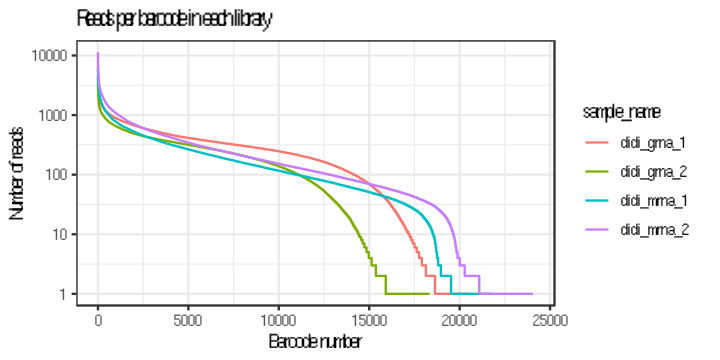

In [10]:
options(repr.plot.width=6, repr.plot.height=3)

plot_data <- barcode_insert_counts %>% 
  group_by(sample_name) %>% 
  arrange(-barcode_count) %>% 
  mutate(xaxis = 1:(dplyr::n())) %>% 
  ungroup() %>% 
  print()

plot_data %>% 
  ggplot(aes(x = xaxis, y = barcode_count, color = sample_name)) +
  geom_line(aes(group = sample_name)) +
  theme_bw() +
  scale_y_log10() +
  labs(x = "Barcode number", y = "Number of reads",
       title = "Reads per barcode in each library") +
  NULL

## Plot CDF of the number of reads per insert, summed over barcodes

`summarise()` has grouped output by 'sample_name'. You can override using the
`.groups` argument.


# A tibble: 1,268 × 4
   sample_name insert_num read_count xaxis
   <chr>            <dbl>      <dbl> <int>
 1 didi_grna_1         23      62136     1
 2 didi_mrna_2        282      60483     1
 3 didi_mrna_2        150      58969     2
 4 didi_grna_1         22      58118     2
 5 didi_mrna_2        151      53454     3
 6 didi_mrna_2         30      51974     4
 7 didi_grna_1         21      51492     3
 8 didi_mrna_2        149      50445     5
 9 didi_grna_1         31      50365     4
10 didi_mrna_2        159      45603     6
# … with 1,258 more rows


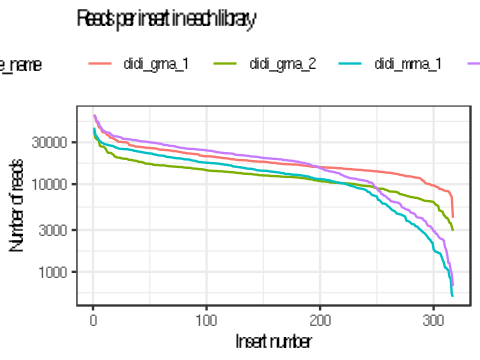

In [11]:
options(repr.plot.width=4, repr.plot.height=3)

plot_data <- barcode_insert_counts %>% 
  group_by(sample_name, insert_num) %>% 
  summarize(read_count = sum(barcode_count)) %>% 
  ungroup() %>% 
  group_by(sample_name) %>% 
  arrange(-read_count) %>% 
  mutate(xaxis = 1:(dplyr::n())) %>% 
  ungroup() %>% 
  print()

plot_data %>% 
  ggplot(aes(x = xaxis, y = read_count, color = sample_name)) +
  geom_line(aes(group = sample_name)) +
  theme_bw() +
  theme(legend.position = "top") +
  scale_y_log10() +
  labs(x = "Insert number", y = "Number of reads",
       title = "Reads per insert in each library") +
  NULL

## Plot read counts of mRNA vs gRNA, summed for each insert


`summarise()` has grouped output by 'library_type'. You can override using the
`.groups` argument.


# A tibble: 317 × 3
   insert_num  grna  mrna
        <dbl> <dbl> <dbl>
 1          0 23605 26302
 2          1 32693 45795
 3          2 23716 25895
 4          3 23062  9845
 5          4 13144 16577
 6          5 12830 12131
 7          6 19084 14085
 8          7 10274  8555
 9          8 12037 16633
10          9 37964 40201
# … with 307 more rows


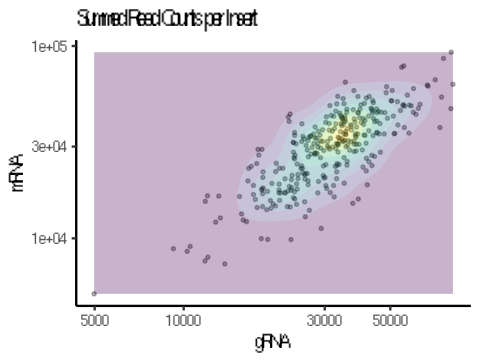

In [12]:
plot_data <- barcode_insert_counts %>% 
  group_by(library_type, insert_num) %>%
  summarize(read_count = sum(barcode_count)) %>%
  ungroup() %>%
  select(insert_num, read_count, library_type) %>%
  pivot_wider(names_from = "library_type", values_from = "read_count") %>%
  print()

plot_data %>%
  filter(!is.na(grna), !is.na(mrna)) %>%
  ggplot(aes(x = grna, y = mrna)) +
  geom_point(alpha = 0.3, size = 0.5) +
  geom_density_2d_filled(alpha = 0.3, show.legend = F) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "gRNA", y = "mRNA",
       title = "Summed Read Counts per Insert") +
  NULL